In [1]:
import pandas as pd # provide rows & columns for analysis
import numpy as np #  provide multidimensional array
import nltk # Natural language Processing ToolKit
import re  # regular expression
import string 
import sklearn
from matplotlib import pyplot as plt  # provide plotting of 2d graphs
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle # save as model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools

In [2]:
df = pd.read_csv('news_datasets.csv', index_col=[0])

In [3]:
df.head(15)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   
1357   With all three Clintons in Iowa, a glimpse at ...   
988    Donald Trump’s Shockingly Weak Delegate Game S...   
7041   Strong Solar Storm, Tech Risks Today | S0 News...   
7623        10 Ways America Is Preparing for World War 3   
1571                    Trump takes on Cruz, but lightly   

                                                    text label  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
875    It's primary day in New York and front-runners...  REAL  
6903     \nI’m not an immigrant, but my grandparents ...  FAKE  
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE  
95     A Czech stockbroker who saved more than 650 Je...  REAL  
4869   Hillary Clinton and Donald Trump made some ina...  REAL  
2909   Iranian negotiators reportedly have made a las...  REAL  
1357   CEDAR RAPIDS, Iowa — “I had one of the most wo...  REAL  
988    Donald Trump’s organizational problems have go...  REAL  
7041   Click Here To Learn More About Alexandra's Per...  FAKE  
7623   October 31, 2016 at 4:52 am \nPretty factual e...  FAKE  
1571   Killing Obama administration rules, dismantlin...  REAL

In [4]:
y=df['label'] # dependent feature
y.head()

8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [5]:
X=df.drop('label',axis=1)

In [6]:
X.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text  
8476   Daniel Greenfield, a Shillman Journalism Fello...  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  
3608   U.S. Secretary of State John F. Kerry said Mon...  
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  
875    It's primary day in New York and front-runners...  
6903     \nI’m not an immigrant, but my grandparents ...  
7341   Share This Baylee Luciani (left), Screenshot o...  
95     A Czech stockbroker who saved more than 650 Je...  
4869   Hillary Clinton and Donald Trump made some ina...  
2909   Iranian negotiators reportedly have made a las...

# Create Independent & Dependent Feature

In [7]:
X=df.dropna() # dropping the null values from dataset

In [8]:
X.shape

(6335, 3)

In [9]:
X.reset_index(inplace=True)

In [10]:
X.head()

index                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

# Remove Punctuation

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [13]:
df['clean_title'] = df['title'].apply(lambda x:remove_punctuation(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  
8476                        You Can Smell Hillary’s Fear  
10294  Watch The Exact Moment Paul Ryan Committed Pol...  
3608         Kerry to go to Paris in gesture of sympathy  
10142  Bernie supporters on Twitter erupt in anger ag...  
875      The Battle of New York Why This Primary Matters  
6903                                          Tehran USA  
7341   Girl Horrified At What She Watches Boyfriend D...  
95                     ‘Britain’s Schindler’ Dies at 106  
4869   Fact check Trump and Clinton at the commanderi...  
2909   Iran reportedly makes new push for uranium con...

In [14]:
df['clean_text'] = df['text'].apply(lambda x:remove_punctuation(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875      The Battle of New York Why This Primary Matters   
6903                                          Tehran USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check Trump and Clinton at the commanderi...   
2909   Iran reportedly makes new push for uranium con...   

                                              clean_text  
8476   Daniel Greenfield a Shillman Journalism Fellow...  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  
3608   US Secretary of State John F Kerry said Monday...  
10142  — Kaydee King KaydeeKing November 9 2016 The l...  
875    Its primary day in New York and frontrunners H...  
6903     \nI’m not an immigrant but my grandparents a...  
7341   Share This Baylee Luciani left Screenshot of w...  
95     A Czech stockbroker who saved more than 650 Je...  
4869   Hillary Clinton and Donald Trump made some ina...  
2909   Iranian negotiators reportedly have made a las...

# Remove stopwords 

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [16]:
def remove_stopwords(txt_tokenize):
    txt_clean = "".join([word for word in txt_tokenize if word not in stopwords])
    return txt_clean

df['no_sw_title'] = df['clean_title'].apply(lambda x: remove_stopwords(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875      The Battle of New York Why This Primary Matters   
6903                                          Tehran USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check Trump and Clinton at the commanderi...   
2909   Iran reportedly makes new push for uranium con...   

                                              clean_text  \
8476   Daniel Greenfield a Shillman Journalism Fellow...   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...   
3608   US Secretary of State John F Kerry said Monday...   
10142  — Kaydee King KaydeeKing November 9 2016 The l...   
875    Its primary day in New York and frontrunners H...   
6903     \nI’m not an immigrant but my grandparents a...   
7341   Share This Baylee Luciani left Screenshot of w...   
95     A Czech stockbroker who saved more than 650 Je...   
4869   Hillary Clinton and Donald Trump made some ina...   
2909   Iranian negotiators reportedly have made a las...   

                                             no_sw_title  
8476                                Yu Cn Sell Hllr’ Fer  
10294  Wch The Exc Men Pul Rn Ce Plcl Suce A A Trup R...  
3608                            Kerr  g  Pr n geure f ph  
10142  Berne upprer n Twer erup n nger gn he DNC We r...  
875                      The Ble f New Yrk Wh Th Prr Mer  
6903                                           Tehrn USA  
7341   Grl Hrrfe A Wh She Wche Bfren D Afer He Lef Fc...  
95                                ‘Brn’ Schnler’ De  106  
4869              Fc check Trup n Clnn  he cnernchef fru  
2909     Irn reprel ke new puh fr urnu cncen n nucler lk

In [17]:
def remove_stopwords(txt_tokenize):
    txt_clean = "".join([word for word in txt_tokenize if word not in stopwords])
    return txt_clean

df['no_sw_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875      The Battle of New York Why This Primary Matters   
6903                                          Tehran USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check Trump and Clinton at the commanderi...   
2909   Iran reportedly makes new push for uranium con...   

                                              clean_text  \
8476   Daniel Greenfield a Shillman Journalism Fellow...   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...   
3608   US Secretary of State John F Kerry said Monday...   
10142  — Kaydee King KaydeeKing November 9 2016 The l...   
875    Its primary day in New York and frontrunners H...   
6903     \nI’m not an immigrant but my grandparents a...   
7341   Share This Baylee Luciani left Screenshot of w...   
95     A Czech stockbroker who saved more than 650 Je...   
4869   Hillary Clinton and Donald Trump made some ina...   
2909   Iranian negotiators reportedly have made a las...   

                                             no_sw_title  \
8476                                Yu Cn Sell Hllr’ Fer   
10294  Wch The Exc Men Pul Rn Ce Plcl Suce A A Trup R...   
3608                            Kerr  g  Pr n geure f ph   
10142  Berne upprer n Twer erup n nger gn he DNC We r...   
875                      The Ble f New Yrk Wh Th Prr Mer   
6903                                           Tehrn USA   
7341   Grl Hrrfe A Wh She Wche Bfren D Afer He Lef Fc...   
95                                ‘Brn’ Schnler’ De  106   
4869              Fc check Trup n Clnn  he cnernchef fru   
2909     Irn reprel ke new puh fr urnu cncen n nucler lk   

                                              no_sw_text  
8476   Dnel Greenfel  Shlln Jurnl Fellw  he Free Cene...  
10294  Ggle Pnere Dgg Lnken Re Subleupn Prn Delcu Pck...  
3608   US Secrer f Se Jhn F Kerr  Mn h he wll p n Pr ...  
10142  — Kee Kng KeeKng Nveber 9 2016 The len fr ngh ...  
875    I prr  n New Yrk n frnrunner Hllr Clnn n Dnl T...  
6903     \nI’ n n grn bu  grnpren re Mre hn 50 er g h...  
7341   Shre Th Blee Lucn lef Screenh f wh Blee cugh n...  
95     A Czech ckbrker wh ve re hn 650 Jewh chlren fr...  
4869   Hllr Clnn n Dnl Trup e e nccure cl urng n NBC ...  
2909   Irnn negr reprel hve e  lch puh fr re cncen fr...

# Apply Lemmatization

In [18]:
wn = nltk.WordNetLemmatizer()

In [19]:
def lemmatization(token_txt):
        text = "".join([wn.lemmatize(word) for word in token_txt])
        return text

In [20]:
df['title_lemmatize'] = df['no_sw_title'].apply(lambda x : lemmatization(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875      The Battle of New York Why This Primary Matters   
6903                                          Tehran USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check Trump and Clinton at the commanderi...   
2909   Iran reportedly makes new push for uranium con...   

                                              clean_text  \
8476   Daniel Greenfield a Shillman Journalism Fellow...   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...   
3608   US Secretary of State John F Kerry said Monday...   
10142  — Kaydee King KaydeeKing November 9 2016 The l...   
875    Its primary day in New York and frontrunners H...   
6903     \nI’m not an immigrant but my grandparents a...   
7341   Share This Baylee Luciani left Screenshot of w...   
95     A Czech stockbroker who saved more than 650 Je...   
4869   Hillary Clinton and Donald Trump made some ina...   
2909   Iranian negotiators reportedly have made a las...   

                                             no_sw_title  \
8476                                Yu Cn Sell Hllr’ Fer   
10294  Wch The Exc Men Pul Rn Ce Plcl Suce A A Trup R...   
3608                            Kerr  g  Pr n geure f ph   
10142  Berne upprer n Twer erup n nger gn he DNC We r...   
875                      The Ble f New Yrk Wh Th Prr Mer   
6903                                           Tehrn USA   
7341   Grl Hrrfe A Wh She Wche Bfren D Afer He Lef Fc...   
95                                ‘Brn’ Schnler’ De  106   
4869              Fc check Trup n Clnn  he cnernchef fru   
2909     Irn reprel ke new puh fr urnu cncen n nucler lk   

                                              no_sw_text  \
8476   Dnel Greenfel  Shlln Jurnl Fellw  he Free Cene...   
10294  Ggle Pnere Dgg Lnken Re Subleupn Prn Delcu Pck...   
3608   US Secrer f Se Jhn F Kerr  Mn h he wll p n Pr ...   
10142  — Kee Kng KeeKng Nveber 9 2016 The len fr ngh ...   
875    I prr  n New Yrk n frnrunner Hllr Clnn n Dnl T...   
6903     \nI’ n n grn bu  grnpren re Mre hn 50 er g h...   
7341   Shre Th Blee Lucn lef Screenh f wh Blee cugh n...   
95     A Czech ckbrker wh ve re hn 650 Jewh chlren fr...   
4869   Hllr Clnn n Dnl Trup e e nccure cl urng n NBC ...   
2909   Irnn negr reprel hve e  lch puh fr re cncen fr...   

                   

In [21]:
df['text_lemmatize'] = df['no_sw_text'].apply(lambda x : lemmatization(x))
df.head(10)

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   
6903                                         Tehran, USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check: Trump and Clinton at the 'commande...   
2909   Iran reportedly makes new push for uranium con...   

                                                    text label  \
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL   
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
875    It's primary day in New York and front-runners...  REAL   
6903     \nI’m not an immigrant, but my grandparents ...  FAKE   
7341   Share This Baylee Luciani (left), Screenshot o...  FAKE   
95     A Czech stockbroker who saved more than 650 Je...  REAL   
4869   Hillary Clinton and Donald Trump made some ina...  REAL   
2909   Iranian negotiators reportedly have made a las...  REAL   

                                             clean_title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875      The Battle of New York Why This Primary Matters   
6903                                          Tehran USA   
7341   Girl Horrified At What She Watches Boyfriend D...   
95                     ‘Britain’s Schindler’ Dies at 106   
4869   Fact check Trump and Clinton at the commanderi...   
2909   Iran reportedly makes new push for uranium con...   

                                              clean_text  \
8476   Daniel Greenfield a Shillman Journalism Fellow...   
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...   
3608   US Secretary of State John F Kerry said Monday...   
10142  — Kaydee King KaydeeKing November 9 2016 The l...   
875    Its primary day in New York and frontrunners H...   
6903     \nI’m not an immigrant but my grandparents a...   
7341   Share This Baylee Luciani left Screenshot of w...   
95     A Czech stockbroker who saved more than 650 Je...   
4869   Hillary Clinton and Donald Trump made some ina...   
2909   Iranian negotiators reportedly have made a las...   

                                             no_sw_title  \
8476                                Yu Cn Sell Hllr’ Fer   
10294  Wch The Exc Men Pul Rn Ce Plcl Suce A A Trup R...   
3608                            Kerr  g  Pr n geure f ph   
10142  Berne upprer n Twer erup n nger gn he DNC We r...   
875                      The Ble f New Yrk Wh Th Prr Mer   
6903                                           Tehrn USA   
7341   Grl Hrrfe A Wh She Wche Bfren D Afer He Lef Fc...   
95                                ‘Brn’ Schnler’ De  106   
4869              Fc check Trup n Clnn  he cnernchef fru   
2909     Irn reprel ke new puh fr urnu cncen n nucler lk   

                                              no_sw_text  \
8476   Dnel Greenfel  Shlln Jurnl Fellw  he Free Cene...   
10294  Ggle Pnere Dgg Lnken Re Subleupn Prn Delcu Pck...   
3608   US Secrer f Se Jhn F Kerr  Mn h he wll p n Pr ...   
10142  — Kee Kng KeeKng Nveber 9 2016 The len fr ngh ...   
875    I prr  n New Yrk n frnrunner Hllr Clnn n Dnl T...   
6903     \nI’ n n grn bu  grnpren re Mre hn 50 er g h...   
7341   Shre Th Blee Lucn lef Screenh f wh Blee cugh n...   
95     A Czech ckbrker wh ve re hn 650 Jewh chlren fr...   
4869   Hllr Clnn n Dnl Trup e e nccure cl urng n NBC ...   
2909   Irnn negr reprel hve e  lch puh fr re cncen fr...   

                   

# Apply count vectorizer 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
cv_title = count_vectorizer.fit_transform(df['title'])
print(cv_title)

  (0, 3394)	1
  (0, 4185)	1
  (0, 8117)	1
  (1, 9395)	1
  (1, 7045)	1
  (1, 9072)	1
  (1, 8539)	1
  (1, 6608)	1
  (1, 1874)	1
  (1, 7613)	1
  (1, 6375)	1
  (1, 5690)	1
  (1, 3192)	1
  (1, 9544)	1
  (2, 8653)	1
  (2, 3813)	1
  (2, 6326)	1
  (2, 4888)	1
  (3, 9519)	1
  (3, 9038)	1
  (3, 2734)	1
  (3, 545)	1
  (3, 3127)	1
  (3, 9130)	1
  (3, 8568)	1
  :	:
  (6330, 1768)	1
  (6331, 6579)	1
  (6331, 6392)	1
  (6331, 8335)	1
  (6331, 6413)	1
  (6332, 8915)	1
  (6332, 6114)	1
  (6332, 6889)	1
  (6332, 4517)	1
  (6332, 579)	1
  (6332, 9072)	1
  (6333, 6833)	1
  (6333, 3152)	1
  (6333, 388)	1
  (6333, 7786)	1
  (6333, 6395)	1
  (6333, 2911)	1
  (6333, 7782)	1
  (6333, 6047)	1
  (6334, 8525)	1
  (6334, 753)	1
  (6334, 1381)	1
  (6334, 4742)	1
  (6334, 5468)	1
  (6334, 9072)	1


In [23]:
cv_text = count_vectorizer.fit_transform(df['text'])
print(cv_text)

  (0, 9426)	1
  (0, 2306)	1
  (0, 29105)	1
  (0, 9918)	1
  (0, 35311)	1
  (0, 11430)	1
  (0, 54380)	1
  (0, 15509)	1
  (0, 41948)	1
  (0, 65925)	1
  (0, 56658)	1
  (0, 52694)	1
  (0, 61780)	1
  (0, 48612)	1
  (0, 12555)	1
  (0, 6162)	1
  (0, 56841)	1
  (0, 10656)	1
  (0, 63415)	1
  (0, 53491)	1
  (0, 64627)	1
  (0, 31267)	1
  (0, 47786)	1
  (0, 31398)	1
  (0, 18595)	1
  :	:
  (6334, 61385)	4
  (6334, 58739)	1
  (6334, 44341)	1
  (6334, 64774)	1
  (6334, 41114)	1
  (6334, 33791)	1
  (6334, 50951)	1
  (6334, 50233)	2
  (6334, 4807)	1
  (6334, 60095)	1
  (6334, 16655)	1
  (6334, 25792)	1
  (6334, 34886)	1
  (6334, 61292)	26
  (6334, 37899)	2
  (6334, 5808)	2
  (6334, 5804)	2
  (6334, 32752)	2
  (6334, 44655)	1
  (6334, 44142)	2
  (6334, 45973)	1
  (6334, 64579)	1
  (6334, 12486)	1
  (6334, 28254)	1
  (6334, 41088)	5


In [24]:
def get_countVectorizer_stats():
    print(cv_title.shape)
    print(count_vectorizer.vocabulary_)
get_countVectorizer_stats()

(6335, 9820)
{'daniel': 15724, 'greenfield': 26250, 'shillman': 54150, 'journalism': 32541, 'fellow': 22700, 'freedom': 24182, 'center': 11214, 'new': 41088, 'york': 66450, 'writer': 66018, 'focusing': 23611, 'radical': 48341, 'islam': 31651, 'final': 23027, 'stretch': 57353, 'election': 19922, 'hillary': 28254, 'rodham': 51270, 'clinton': 12486, 'gone': 25843, 'war': 64579, 'fbi': 22540, 'word': 65821, 'unprecedented': 62689, 'thrown': 59927, 'ought': 43077, 'retired': 50571, 'nominee': 41503, 'major': 36681, 'political': 45973, 'party': 44142, 'exactly': 21480, 'people': 44655, 'coma': 13029, 'patients': 44275, 'just': 32752, 'waking': 64459, 'watching': 64712, 'hour': 28943, 'cnn': 12654, 'hospital': 28887, 'beds': 7280, 'assume': 5624, 'director': 17678, 'james': 31980, 'comey': 13081, 'opponent': 42738, 'attack': 5804, 'obama': 42079, 'circulated': 12143, 'letter': 35112, 'attacking': 5808, 'currently': 15398, 'media': 37899, 'hit': 28402, 'pieces': 45274, 'lambasting': 34337, 'ta

In [25]:
def get_countVectorizer_stats():
    print(cv_text.shape)
    print(count_vectorizer.vocabulary_)
get_countVectorizer_stats()

(6335, 67351)
{'daniel': 15724, 'greenfield': 26250, 'shillman': 54150, 'journalism': 32541, 'fellow': 22700, 'freedom': 24182, 'center': 11214, 'new': 41088, 'york': 66450, 'writer': 66018, 'focusing': 23611, 'radical': 48341, 'islam': 31651, 'final': 23027, 'stretch': 57353, 'election': 19922, 'hillary': 28254, 'rodham': 51270, 'clinton': 12486, 'gone': 25843, 'war': 64579, 'fbi': 22540, 'word': 65821, 'unprecedented': 62689, 'thrown': 59927, 'ought': 43077, 'retired': 50571, 'nominee': 41503, 'major': 36681, 'political': 45973, 'party': 44142, 'exactly': 21480, 'people': 44655, 'coma': 13029, 'patients': 44275, 'just': 32752, 'waking': 64459, 'watching': 64712, 'hour': 28943, 'cnn': 12654, 'hospital': 28887, 'beds': 7280, 'assume': 5624, 'director': 17678, 'james': 31980, 'comey': 13081, 'opponent': 42738, 'attack': 5804, 'obama': 42079, 'circulated': 12143, 'letter': 35112, 'attacking': 5808, 'currently': 15398, 'media': 37899, 'hit': 28402, 'pieces': 45274, 'lambasting': 34337, 't

# Apply Tfidf vectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [27]:
tfidf_title = tfidf_vectorizer.fit_transform(df['title'])

In [28]:
def get_tfidf_stats():
    print(tfidf_title.shape)
    print(tfidf_title.A[:10])
get_tfidf_stats()  

(6335, 9820)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
tfidf_text = tfidf_vectorizer.fit_transform(df['text'])

In [30]:
def get_tfidf_stats():
    print(tfidf_text.shape)
    print(tfidf_text.A[:10])
get_tfidf_stats()  

(6335, 67351)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03852305 0.         ... 0.         0.         0.        ]]


In [31]:
print(tfidf_vectorizer.get_feature_names()[10:])

['000billion', '000ft', '000km', '000x', '001', '0011', '002', '003', '004', '004s', '005', '005s', '006', '00684', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '011', '012', '013', '013c2812c9', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '02714', '028', '02870', '02welcome', '03', '030', '031', '032', '0325', '033', '034', '035', '037', '03747', '039', '03eb', '04', '040', '0400', '042', '044', '047', '048', '049', '04pm', '05', '050', '0509245d29', '052', '053', '056', '058', '06', '0600', '062', '063', '0640', '066', '068', '06pm', '07', '0700', '071', '075', '0750', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '0843', '085', '0851', '089', '0891', '09', '091', '093', '098263', '09am', '09pm', '0_65b67362bd', '0_jgdktlmn', '0_kvyhphja', '0a_merrill', '0b6njlny5j', '0d', '0dpbdk6rjd', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hour', '0hq3vb2giv', '

In [32]:
print(count_vectorizer.get_feature_names()[10:])

['000billion', '000ft', '000km', '000x', '001', '0011', '002', '003', '004', '004s', '005', '005s', '006', '00684', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '011', '012', '013', '013c2812c9', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '02714', '028', '02870', '02welcome', '03', '030', '031', '032', '0325', '033', '034', '035', '037', '03747', '039', '03eb', '04', '040', '0400', '042', '044', '047', '048', '049', '04pm', '05', '050', '0509245d29', '052', '053', '056', '058', '06', '0600', '062', '063', '0640', '066', '068', '06pm', '07', '0700', '071', '075', '0750', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '0843', '085', '0851', '089', '0891', '09', '091', '093', '098263', '09am', '09pm', '0_65b67362bd', '0_jgdktlmn', '0_kvyhphja', '0a_merrill', '0b6njlny5j', '0d', '0dpbdk6rjd', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hour', '0hq3vb2giv', '

#  Create Train and Test data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],y, test_size=0.33, random_state=54) 

In [34]:
X_train.head(10)

7685     Ellis Morning Editor \nAn Anonymous source sen...
4280     We’ll get to the GOP debate momentarily. But f...
10144      by Jon Rappoport — Jon Rappoport’s blog Oct ...
6665     Next Story → Judge Judy LOSES IT on Hood Rat: ...
3974     Washington (CNN) Even before the debris from t...
7680     Report Copyright Violation nuclear weapons que...
886      The chances of Donald Trump becoming the Repub...
152      Notable names include Ray Washburne (Commerce)...
3392     The State Department accused Israeli Prime Min...
8972     U-M’s New ‘Chief Diversity Officer’ Will Colle...
Name: text, dtype: object

In [35]:
X_test.head(10)

10300    Print Email http://humansarefree.com/2016/10/i...
623      The election in 232 photos, 43 numbers and 131...
7528     Print \nIt looks like the vaunted air space co...
4716     GOP vice presidential candidate Mike Pence sai...
4985     The lawyer gave Donald Trump a note, written i...
5066     Ed Morrissey is senior editor at HotAir.com, a...
1142     Sparks Fly Between Clinton And Sanders At Flin...
6641     This Collage of Corrupt Presstitutes Making Fo...
3210     Nashua, New Hampshire (CNN) Jeb Bush took the ...
639      Katie Walsh, the Republican National Committee...
Name: text, dtype: object

#  Apply Confusion matrix 

In [36]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Apply classifier as Multinomial

In [37]:
nb_pipeline = Pipeline([
    ('NBTV',tfidf_vectorizer),
    ('nb_clf',MultinomialNB())
])

In [38]:
nb_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('NBTV',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [39]:
predicted_nbt = nb_pipeline.predict(X_test)

In [40]:
score = metrics.accuracy_score(y_test, predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 82.97%


confusion matrix, without normalization


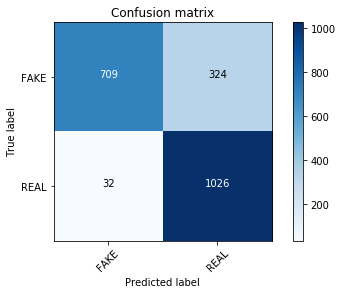

In [41]:
cm = metrics.confusion_matrix(y_test, predicted_nbt, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

In [42]:
print(cm)

[[ 709  324]
 [  32 1026]]


In [43]:
nbc_pipeline = Pipeline([
    ('NBCV',count_vectorizer),
    ('nb_clf',MultinomialNB())
])
nbc_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('NBCV',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
predicted_nbc = nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(y_test, predicted_nbc)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.33%


confusion matrix, without normalization


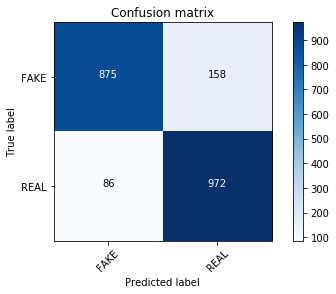

In [45]:
cm1 = metrics.confusion_matrix(y_test, predicted_nbc, labels=['FAKE','REAL'])
plot_confusion_matrix(cm1, classes=['FAKE','REAL'])

In [46]:
print(cm1)

[[875 158]
 [ 86 972]]


In [47]:
print(metrics.classification_report(y_test, predicted_nbt))

              precision    recall  f1-score   support

        FAKE       0.96      0.69      0.80      1033
        REAL       0.76      0.97      0.85      1058

    accuracy                           0.83      2091
   macro avg       0.86      0.83      0.83      2091
weighted avg       0.86      0.83      0.83      2091



In [48]:
print(metrics.classification_report(y_test, predicted_nbc))

              precision    recall  f1-score   support

        FAKE       0.91      0.85      0.88      1033
        REAL       0.86      0.92      0.89      1058

    accuracy                           0.88      2091
   macro avg       0.89      0.88      0.88      2091
weighted avg       0.89      0.88      0.88      2091



#  Apply classifier as Passive Aggressive

In [49]:
linear_clf = Pipeline([
    ('linear',tfidf_vectorizer),
    ('pa_clf',PassiveAggressiveClassifier(max_iter=50))
])
linear_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('linear',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
       

In [50]:
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.12%


confusion matrix, without normalization


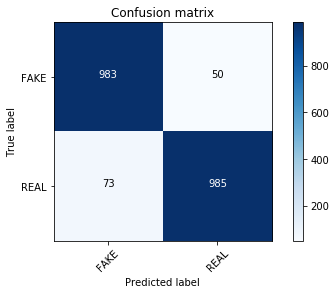

In [51]:
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

In [52]:
print(cm)

[[983  50]
 [ 73 985]]


In [53]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94      1033
        REAL       0.95      0.93      0.94      1058

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091



In [54]:
model_file = 'final_model_text.sav'
pickle.dump(linear_clf,open(model_file,'wb'))

In [6]:
import pickle
var = input("Please enter the news text you want to verify: ")

def detecting_fake_news(var):
    load_model = pickle.load(open('final_model_text.sav','rb'))
    prediction = load_model.predict([var])
    
    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: "It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.  Trump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.  A big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.  ""We have won eight out of the last nine caucuses and primaries! Cheer!"" Sanders recently told supporters.  While wins in New York for Trump and Clinton are expected, the margins of those victories are also important.  Trump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state's 95 GOP delegates. That would put him o